In [1]:
import sys 
import os
sys.path.append(os.path.abspath(r'scrapers\\reddit_scraper\\'))
import reddit_scraper

c:\Users\nixma\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [2]:
import pandas as pd

conf_ds=reddit_scraper.df

In [3]:
conf_ds=conf_ds[((conf_ds['Content']=='[removed]') | (conf_ds['Content']=='[deleted]'))==False]
conf_ds=conf_ds.reset_index()
conf_ds

,index,Title,Score,Number_Of_Comments,Publish_Date,Content,Category
0,2,Not sure what to put as the title,19,8,1.666227e+09,Downloaded tinder after me and my ex split up....,rape
1,6,I’m going to rape and kill u HA HA! Also he ha...,0,50,1.665029e+09,,rape
2,9,TW: Abuse and Rape. This was literally the 3rd...,10906,956,1.656001e+09,,rape
3,11,Tinder Banned Certain Words,6,2,1.649948e+09,According to a Tinder employee ([https://www.y...,rape
4,14,"Ladies, do you have a rape fantasy?",0,43,1.647809e+09,\n\n[View Poll](https://www.reddit.com/poll/ti...,rape
...,...,...,...,...,...,...,...
1963,4345,DAE Feel weird when the profile picture is a kid?,0,0,1.408131e+09,Swipe swipe swipe swipe swipe...oh i just like...,child
1964,4348,"Yes, the head circumference of your child does...",21,3,1.404783e+09,,child
1965,4349,Dark child aka asura so phat,12,0,1.404007e+09,http://imgur.com/QSmnv6O,child
1966,4350,Why the fuck are you open-mouthed kissing (wit...,16,10,1.402205e+09,,child


In [4]:
conf_ds=conf_ds.sort_values(by=['Score'],ascending=False)
conf_ds

,index,Title,Score,Number_Of_Comments,Publish_Date,Content,Category
1125,2451,First Date Thought I was a Catfish 😂,89715,873,1.648177e+09,,catfish
1885,4189,"UPDATE: Yes, I am 5'4. Yes, she is 5'11. And, ...",56797,3623,1.556376e+09,,child
1497,3360,Introducing the world’s worst catfish,53490,609,1.556144e+09,[ Removed by reddit in response to a copyright...,catfish
1850,4126,A child friendly train fact,52654,700,1.587564e+09,,child
920,2051,"I felt attacked for a moment, then I realized",35698,252,1.608978e+09,,attacked
...,...,...,...,...,...,...,...
976,2148,"If she’s anything like Biden, she’ll forget wh...",0,6,1.627626e+09,,assault
141,276,I this might be a scam you guy.,0,8,1.659169e+09,,scam
751,1681,Cam show?,0,4,1.500267e+09,So someone from tinder is trying to recruit me...,scam
752,1682,Are there thirsty beta males actually dumb eno...,0,2,1.499881e+09,"Also, what happens after they make the transac...",scam


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nixma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

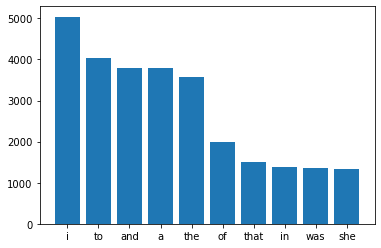

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re
import unicodedata
import string

nltk.download("stopwords")

stops = set(stopwords.words("english"))
#Building the corpus
corpus=[]
conf_ds['PreProcessedContent']=conf_ds['Content'].str.lower()
conf_ds['PreProcessedTitle']=conf_ds['Title'].str.lower()
content= conf_ds['PreProcessedContent'].str.split()
content=content.values.tolist()
corpus=[word for i in content for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stops:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [6]:
import datetime

def change_epoch2date(date):
    return datetime.datetime.utcfromtimestamp(date).strftime('%d/%m/%Y')
conf_ds['Publish_Date']=conf_ds['Publish_Date'].apply(change_epoch2date)

def remove_whitespace(text):
    return  " ".join(text.split())
conf_ds['PreProcessedContent']=conf_ds['PreProcessedContent'].apply(remove_whitespace)
conf_ds['PreProcessedTitle']=conf_ds['PreProcessedTitle'].apply(remove_whitespace)

def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
conf_ds['PreProcessedContent']=conf_ds['PreProcessedContent'].apply(remove_accented_chars)
conf_ds['PreProcessedTitle']=conf_ds['PreProcessedTitle'].apply(remove_accented_chars)

def text_to_wordlist(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    
    text = " ".join(text)
    ## Clean the text
    text= re.sub("[^a-zA-Z]+", " ", text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"U ","you ", text)
    text = re.sub(r" u ", " you ", text)
    text = re.sub(r"ü ", "you ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"da ", " the ", text) 
    text = re.sub(r" b ", " be ", text)
    text = re.sub(r"'m", " am ", text)
    text = re.sub(r" IM ", " i am ", text)
    text = re.sub(r" im ", " i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r" wd ", " would ", text)
    text = re.sub(r" shd ", " should ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    text = re.sub("\b(?<![0-9-])(\d+)(?![0-9-])\b", " ",text)
    return text

conf_ds['PreProcessedContent']=conf_ds['PreProcessedContent'].apply(text_to_wordlist)
conf_ds['PreProcessedContent']=conf_ds['PreProcessedContent'].apply(remove_whitespace)
conf_ds['PreProcessedTitle']=conf_ds['PreProcessedTitle'].apply(text_to_wordlist)
conf_ds['PreProcessedTitle']=conf_ds['PreProcessedTitle'].apply(remove_whitespace)


conf_ds

,index,Title,Score,Number_Of_Comments,Publish_Date,Content,Category,PreProcessedContent,PreProcessedTitle
1125,2451,First Date Thought I was a Catfish 😂,89715,873,25/03/2022,,catfish,,first date thought catfish
1885,4189,"UPDATE: Yes, I am 5'4. Yes, she is 5'11. And, ...",56797,3623,27/04/2019,,child,,update yes yes and yes make perfect sized child
1497,3360,Introducing the world’s worst catfish,53490,609,24/04/2019,[ Removed by reddit in response to a copyright...,catfish,removed reddit response copyright notice,introducing worlds worst catfish
1850,4126,A child friendly train fact,52654,700,22/04/2020,,child,,child friendly train fact
920,2051,"I felt attacked for a moment, then I realized",35698,252,26/12/2020,,attacked,,felt attacked moment realized
...,...,...,...,...,...,...,...,...,...
976,2148,"If she’s anything like Biden, she’ll forget wh...",0,6,30/07/2021,,assault,,shes anything like biden shell forget halfway ...
141,276,I this might be a scam you guy.,0,8,30/07/2022,,scam,,might scam guy
751,1681,Cam show?,0,4,17/07/2017,So someone from tinder is trying to recruit me...,scam,someone tinder trying recruit partner cam show...,cam show
752,1682,Are there thirsty beta males actually dumb eno...,0,2,12/07/2017,"Also, what happens after they make the transac...",scam,also happens make transaction,thirsty beta males actually dumb enough fall v...


In [8]:
import spacy

In [9]:
# Finding how many posts are empty

(conf_ds['PreProcessedContent']=='').sum()

1173

In [10]:
#dropping the child category and empty posts
conf_ds=conf_ds[(conf_ds['Category']=='child')==False]
conf_ds=conf_ds.drop(conf_ds[conf_ds['PreProcessedContent']==''].index)
print(conf_ds.shape)
conf_ds=conf_ds.reset_index()

(684, 9)


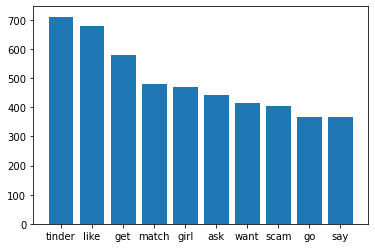

In [24]:
from nltk.stem.porter import *

stemmer= PorterStemmer()

content= conf_ds['PreProcessedContent'].str.split()
content=content.values.tolist()
corpus=[word for i in content for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word not in stops:
        dic[stemmer.stem(word)]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

dic1=dic

<BarContainer object of 10 artists>

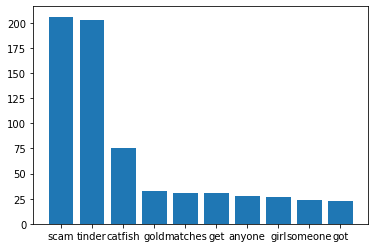

In [25]:
content= conf_ds['PreProcessedTitle'].str.split()
content=content.values.tolist()
corpus_title=[word for i in content for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus_title:
    if word not in stops:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [26]:
conf_ds=conf_ds.replace('attacked','assault')
conf_ds=conf_ds.replace('rape','sexual assault')
conf_ds.to_excel("Cleaned-TinderStories.xlsx")

In [29]:
word_count=pd.DataFrame([dic1])
word_count=word_count.T
word_count=word_count.reset_index()
word_count.columns=['Word','Count']
#word_count['Word']=word_count['Word'].apply(stemmer.stem)
word_count=word_count.sort_values(by=['Count'],ascending=False)
word_count.to_csv("Word_Dict.csv")

In [30]:
word_count.sort_values(by=['Count'],ascending=False)

,Word,Count
163,tinder,711
157,like,679
83,get,579
467,match,480
166,girl,468
...,...,...
4583,mf,1
4584,cheer,1
4585,corona,1
1854,blm,1


In [59]:
conf_ds[conf_ds['Category']=='phishing']['Content']

36     So as the title reads, I was banned from tinde...
102    I've been talking with this cute chick from cl...
165    Guy called Carl age 36 on tinder posing as ric...
170    Kind of new to the app but all I can say is it...
295    Just matched with a girl and messaged her. She...
452    Spoke to a girl, she asked for my number, I ga...
675    Does it work or is it a scam / phishing app?\n...
Name: Content, dtype: object

In [60]:
conf_ds['Category'].unique()

array(['catfish', 'robbed', 'scam', 'sexual assault', 'assault',
       'phishing'], dtype=object)